# <span style="color:green;">**Analysis of Breast Cancer Wisconia Dataset; and selecting the best machine learning model to predict the patient is having cancer or not!**
# <span style="color:green;">**By:-Balkrishan_Mahabir**
    

# <span style="color:green;"> Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control.Breast cancer can occur in women and rarely in men.
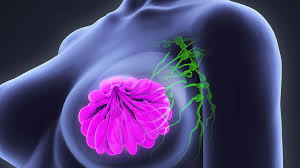

# <span style= "color:green;">What is a lump?¶
        
<span style="color:green;">A lump is a protuberance or localized area of swelling that can occur anywhere on the body.

# <span style= "color:green;">Does a lump mean cancer?
    
<span style= "color:green;">Just because you or your doctor found a lump, does not mean you have cancer. Not every lump is worth worrying about—and some can be deceiving. According to a recent study, in women younger than 40, 80 to 85 percent of breast lumps are benign and non-cancerous

# <span style="color:green;">Symptoms
<span style= "color:green;">Include a lump in the breast.
<span style= "color:green;">Bloody discharge from the nipple.
<span style= "color:green;">Changes in the shape or texture of the nipple or breast
    
# <span style= "color:green;">Self treatment
<span style= "color:green;">Reducing dietary salt.
<span style= "color:green;">Exercise, massage, compression and elevating the swollen area.
   
# <span style= "color:green;">See a doctor immediately if:
<span style= "color:green;">Have shortness of breath or difficulty breathing.
<span style= "color:green;">Feel chest pain.
<span style= "color:green;">Develop swelling or pain in one limb.
<span style= "color:green;">Rapidly gain weight.

# **<span style="color:green;">What is  (FNA) Fine Needle Aspiration test**
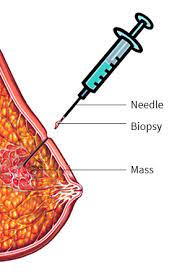
    
    
<span style="color:green;">**Fine needle aspiration (FNA), also called fine needle biopsy, is a type of biopsy where a needle is inserted into a lump or mass to collect a sample of cells. These cells are then looked at under a microscope to help your doctor determine if the mass or lump is cancerous (malignant) or noncancerous (benign)**

#  <span style="color:green;"> (Column name/Terms):
   **<span style="color:green;">diagnosis: The diagnosis of breast tissues {M = malignant (cancerous), B = benign (noncancerous)}**
   **<span style="color:green;">radius_meanmean: of distances from center to points on the perimete**
**<span style="color:green;">texture_mean: standard deviation of gray-scale values**

**<span style="color:green;">perimeter_mean: mean size of the core tumor**

**<span style="color:green;">smoothness_mean: mean of local variation in radius length**

**<span style="color:green;">compactness_mean: mean of perimeter^2 / area - 1.0**

**<span style="color:green;">concavity_mean:mean of severity of concave portions of the contour**

**<span style="color:green;">concave points_mean: mean for number of concave portions of the contour**

**<span style="color:green;">fractal_dimension_se: standard error for "coastline approximation" - 1**

**<span style="color:green;">radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter**

**<span style="color:green;">texture_worst: "worst" or largest mean value for standard deviation of gray-scale values**

**<span style="color:green;">smoothness_worst: "worst" or largest mean value for local variation in radius lengths**

**<span style="color:green;">compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0**

**<span style="color:green;">concavity_worst: "worst" or largest mean value for severity of concave portions of the contou**

**<span style="color:green;">concave points_worst: "worst" or largest mean value for number of concave portions of the contour**

**<span style="color:green;">smoothness_worst: "worst" or largest mean value for local variation in radius lengths**

**<span style="color:green;">fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1**

# <span style="color:green;">Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns # for visualization
import scipy as sp # for scintific computing
import datetime
import warnings
warnings.filterwarnings('ignore')

# <span style="color:green;"> Loading the updated dataset

In [18]:
df=pd.read_csv(r"../input/breast-cancer-wisconsin-data/data.csv")
df.head().style.set_properties(**{'background-color': 'lightblue',
                          'color':'darkblue',
                          'border-color': 'brown',
                          'border-width': '1px',
                          'border-style':'solid'})

# <span style="color:green;"> columns

In [4]:
df.columns

# <span style="color:green;"> Droping unnecessary columns

In [19]:
df.drop(columns=['Unnamed: 32','id'],inplace=True)

# <span style="color:green;">Checking null values

In [6]:
df.isnull().sum()

# <span style="color:green;">Statistical data of each column

In [7]:
df.describe().style.set_properties(**{'background-color': 'lightblue',
                          'color':'darkblue',
                          'border-color': 'brown',
                          'border-width': '1px',
                          'border-style':'solid'})

# <span style="color:green;">Correlation Matrix

In [8]:
df.corr().head().style.set_properties(**{'background-color': 'lightblue',
                          'color':'darkblue',
                          'border-color': 'brown',
                          'border-width': '1px',
                          'border-style':'solid'})

# <span style="color:green;">Corelation plot

In [9]:
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, cmap='Greens', mask=mask)
plt.show()

# <span style="color:green;">Feature selection code

In [20]:
def correlation (features,threshold):
    col_corr=set()
    corr_matrix=features.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname =corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

# <span style="color:green;">Feature selection Thresholds

# <span style="color:green;">Numbers of similar features

In [21]:
corr_features=correlation(df,0.85)
len(set(corr_features))

# <span style="color:green;">Name of similar features

In [12]:
corr_features

# <span style="color:green;">Droping the features having higher similarity than 0.85, to avoid overfitting

In [22]:
df=df.drop(corr_features, axis=1)

In [14]:
df.shape

In [15]:
df.head().style.set_properties(**{'background-color': 'lightblue',
                          'color':'darkblue',
                          'border-color': 'brown',
                          'border-width': '1px',
                          'border-style':'solid'})

# <span style="color:green;">PLot of Malignant VS Benign

In [16]:
plt.figure(figsize=(10,8))
sns.histplot(df.diagnosis ,kde=False)

In [17]:
df.columns

# <span style="color:green;">Data distribution pairplots of features to check how much data overlaps or separated

In [18]:
features = df[['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'symmetry_worst',
       'fractal_dimension_worst','diagnosis']]
sns.pairplot(features, hue='diagnosis', markers=["o", "s"])

# <span style="color:green;">LabelEncoder to replace strings data into "0" & "1"

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [26]:
df.head().style.set_properties(**{'background-color': 'lightblue',
                          'color':'darkblue',
                          'border-color': 'brown',
                          'border-width': '1px',
                          'border-style':'solid'})

# <span style="color:green;"> 1:Malignant(Cancerous), 0:Benign(Non-Cancerous)

# <span style="color:green;">Scalling the column "radius_mean"&"texture_mean for better distribution and accuracy

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()

In [136]:
df[["radius_mean","texture_mean"]]=scaling.fit_transform(df[["radius_mean","texture_mean"]])

In [29]:
df.head().style.set_properties(**{'background-color': 'lightblue',
                          'color':'darkblue',
                          'border-color': 'brown',
                          'border-width': '1px',
                          'border-style':'solid'})

In [30]:
def highlight_number(number):
    criteria=number==1
    print(["background-color:yellow" if i else "" for i in criteria])
    return["background-color:yellow" if i else "" for i in criteria]     
df.head().style.apply(highlight_number)


# <span style="color:green;"> Selecting X as a features/ independent variable

In [31]:
X=df.drop('diagnosis', axis=1)
X.head().style.set_properties(**{'background-color': 'lightblue',
                          'color':'darkblue',
                          'border-color': 'brown',
                          'border-width': '1px',
                          'border-style':'solid'})

# <span style="color:green;">Selecting y as a dependent or target Variable

In [32]:
y=df['diagnosis']
y

# <span style="color:green;">Spliting the dataset into training and testing types

In [59]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train= train_test_split(X,y,test_size=0.3)

In [102]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs')
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

# <span style="color:green;"> Logistic Regression model is :89.69% Accurate

In [103]:
from sklearn.svm import SVC
svm=SVC(gamma='scale')
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

# <span style="color:green;"> SVM support vector machine model is :89.94% Accurate

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=80)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

# <span style="color:green;"> RandomForestClassifier model is :94.97% Accurate,
# <span style="color:brown;"> RandomForestClassifier is found to be the best suitable model for the prediction with highest accuracy

In [133]:
y_pred=rf.predict(X_test)
y_pred

# <span style="color:green;"> probability of prediction

In [153]:
y_prob=rf.predict_proba(X_test)
y_prob

# <span style="color:green;"> Confusion matrix

In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

In [124]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')

# <span style="color:green;"> Classification Report

In [125]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(classification_report(y_test,y_pred))

In [128]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# <span style="color:green;"> Plotting of ROC and AUC curve

In [139]:
    y_predicted=rf.predict(X_test)
    y_prob=rf.predict_proba(X_test)
    plt.figure(figsize = (15,10))
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
    plt.subplot(2, 2, 1)
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'g--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC (Receiver operating characteristic) Curve')
    plt.legend()
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob[:,1])
    plt.subplot(2, 2, 2)
    plt.title("Precision-Recall-F1 vs Threshold Chart")
    plt.plot(thresholds, precision[: -1], "b--", label="Precision")
    plt.plot(thresholds, recall[: -1], "r--", label="Recall")
    plt.plot(thresholds, (2*precision[:-1]*recall[:-1])/(precision[:-1]+recall[:-1]), "g--", label="F1_score")
    plt.ylabel("Precision, Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.show()
    return (y_predicted, y_prob)

# <span style="color:green;">It is a case of cancer prediction, so 1-cancerous and 0- Non-cancerous
# <span style="color:green;">Precesion =TP/TP+FP   , Recall=TP/TP+FN
# <span style="color:green;">False Positive:- A non cancerous patient is declared as a cancerous patient- No serious issue
# <span style="color:green;">False Negative:- A cancerous patient is declared as a Non-Cancerous patient- Life threatning
# <span style="color:green;">So, FN should be keep as low as possible
# <span style="color:green;">Recall=TP/TP+FN , as FN decreases Recall increases,
# <span style="color:green;">So in this case we should keep recall high.


In [159]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(classification_report(y_test,y_pred))

# <span style="color:green;"> so here recall of 1 is 0.90, which needed to be increased

In [156]:
y_prob=rf.predict_proba(X_test)
y_prob

In [154]:
y_prob[:20,1]

# <span style="color:green;">Earlies " when probability >0.5 then its select 1, Now when probability >0.3 then it will select 1"

In [155]:
y_prob_n>0.3

# <span style ="color: green;"> Converting boolean into digits

In [ ]:
y_prob_n=y_prob[:,1]
y_prob_fr_high_rcl=(y_prob_n>0.3)*1

 # <span style ="color:green;">Now the recall for one has been rises from 0.90 to 0.99, and it drops the False negative which will decreases the chances of selecting cancerous 
    #<span style ="color:green;">patient as anon cancerous

In [150]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_prob_fr_high_rcl)
print(cr)

 # <span style ="color:green;"> RandomForestclassifier is the best model for prediction , and for better accuracy recall for cancerous "M" should be kept high